# Call necessary packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

# Importing the Data

In [9]:
b1=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\Machine Learning\SVM\bankloan.csv")
b1.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0
3,41,1,15,14,120,2.9,2.66,0.82,0
4,24,2,2,0,28,17.3,1.79,3.06,1


In [10]:
b1.shape

(700, 9)

In [83]:
b1.default.value_counts()

0    517
1    183
Name: default, dtype: int64

In [11]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


In [12]:
b1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

# Plot Default

In [13]:
b1.head(3)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.36,5.01,1
1,27,1,10,6,31,17.3,1.36,4.00,0
2,40,1,15,14,55,5.5,0.86,2.17,0


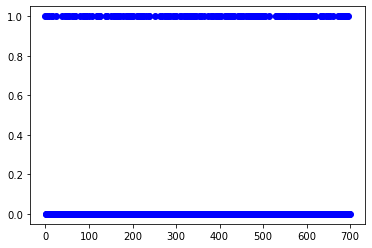

In [15]:
plt.plot(b1.default,'bo')             # bo is blue circles , ro is red circles

In [16]:
b1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

# Will Input Variables

In [17]:
# below ... run in one block

b1_data=b1.drop(['address','ed','debtinc','employ'],axis=1)

In [18]:
b1_data.head(3)

,age,income,creddebt,othdebt,default
0,41,176,11.36,5.01,1
1,27,31,1.36,4.00,0
2,40,55,0.86,2.17,0


In [19]:
b1_data.shape

(700, 5)

In [21]:
X=b1_data.loc[:,b1_data.columns!='default']       # only predictors
y=b1_data.loc[:,b1_data.columns=='default']       # only target variable

In [22]:
X.head(3)

,age,income,creddebt,othdebt
0,41,176,11.36,5.01
1,27,31,1.36,4.00
2,40,55,0.86,2.17


In [23]:
X.shape

(700, 4)

In [26]:
y.head(3)

,default
0,1
1,0
2,0


In [27]:
y.shape

(700, 1)

# Training and Testing data set

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [33]:
print('X_train =',len(X_train))
print('X_test =',len(X_test))
print('y_train =',len(y_train))
print('y_test =',len(y_test))

X_train = 420
X_test = 280
y_train = 420
y_test = 280


# Build a model on Training Set

In [35]:
svcT=svm.SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(X_train,y_train)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(svcT)                      # svcT = support vector classifier Train

SVC(C=1, gamma='auto', kernel='linear', probability=True)


# Do Prediction

In [39]:
y_pred=svcT.predict(X_test)

# Predicted value using Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[194,  12],
       [ 60,  14]], dtype=int64)

# Finding Precisioin,Recall and F1 score

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       206
           1       0.54      0.19      0.28        74

    accuracy                           0.74       280
   macro avg       0.65      0.57      0.56       280
weighted avg       0.70      0.74      0.69       280



# Predicted Probability

# ROC Curve

In [45]:
preds1=svcT.predict_proba(X_test)[:,1]

In [46]:
preds1.shape

(280,)

# False Positive Rate,True Positive Rate and Threshold

In [47]:
from sklearn.metrics import roc_curve,auc

In [49]:
fpr1,tpr1,thresholds1=metrics.roc_curve(y_test,preds1)

In [50]:
df1=pd.DataFrame(dict(fpr=fpr1,tpr=tpr1))

In [52]:
auc=metrics.auc(fpr1,tpr1)
auc

0.6995539228548938

# ROC Curve

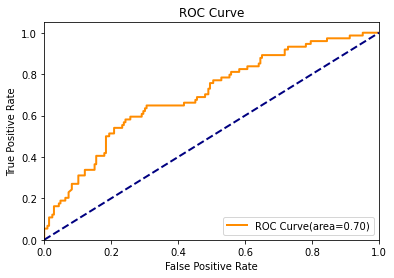

In [53]:
plt.figure()
lw=2
plt.plot(fpr1,tpr1,color='darkorange',lw=lw,label='ROC Curve(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 

# Regression problem

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
dataset=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\Machine Learning\SVM\petrol_consumption.csv")
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [56]:
dataset=pd.DataFrame(dataset)

# See the data 

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [61]:
dataset.shape

(48, 5)

In [62]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Dividing the data into feature and target variable

In [64]:
X=dataset.loc[:,dataset.columns!='Petrol_Consumption']
y=dataset.loc[:,dataset.columns=='Petrol_Consumption']

# let we split the data

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [67]:
print('X_train =',len(X_train))
print('X_test =',len(X_test))
print('y_train =',len(y_train))
print('y_test =',len(y_test))

X_train = 38
X_test = 10
y_train = 38
y_test = 10


# Kernel=rbf  [Radial basis function]

In [70]:
from sklearn.svm import SVR

svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)

In [74]:
svr_lin=SVR(kernel='linear',C=1e3)

In [72]:
y_rbf=svr_rbf.fit(X_train,y_train).predict(X_test)        # using rbf
y_rbf

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([583.98421053, 583.98421053, 583.98421053, 583.98421053,
       583.98421053, 583.98421053, 583.98421053, 583.98421053,
       583.98421053, 583.98421053])

# Kernel linear

In [75]:
y_lin=svr_lin.fit(X_train,y_train).predict(X_test)                  # using linear

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
y_lin

array([ 1038.72490727, -1816.52494253, -1576.31152285, -1978.31697263,
       -2275.36962999, -1339.50301494, -2891.6865529 ,  -485.92232503,
        2876.29474102,  3037.37503158])

In [79]:
y.iloc[:,0]        # you can easily see now which is more nearer to the actual y_rbf method or y_linear

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64


In [80]:
y_test.shape

(10, 1)

# look at the result   will see the result by ploting the Graph

# Now compare rbf versus linear by visually 

In [84]:
x.shape

(10,)

In [86]:
y_test.shape

(10, 1)

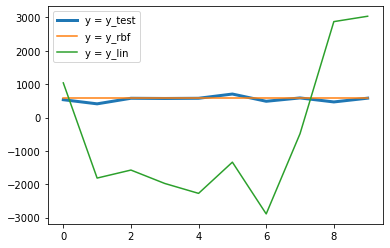

In [81]:
x=np.arange(10)
plt.plot(x,y_test,lw=3)
plt.plot(x,y_rbf)
plt.plot(x,y_lin)
plt.legend(['y = y_test','y = y_rbf','y = y_lin'],loc='upper left')
plt.show()

### Where the plot says that y_rbf is very closely predicted to actual value 

### so we can conclude that y_rbf is better than y_lin